*Loading and pre-processing the data:*

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.datasets import fetch_olivetti_faces
from sklearn import metrics

#data = fetch_olivetti_faces()
#data = np.array(data)
olivetti = fetch_olivetti_faces()
data = olivetti.images
target = olivetti.target


print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(data.shape[1],data.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(data[0][0,:4]))

#We reshape images for machine learnig  model
X = data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("X shape:",X.shape)

# Test-train split

X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.3, stratify=target, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]
X shape: (400, 4096)
X_train shape: (280, 4096)
y_train shape:(280,)


*Applying PCA on dataset:*

In [ ]:
n_components = 180

pca = PCA(n_components=n_components, whiten=True)
pca.fit(X_train)

PCA(n_components=180, whiten=True)

*Classification with SVM post-PCA:*

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

clf = SVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print("accuracy score: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

accuracy score: 0.91


*Confusion Matrix:*

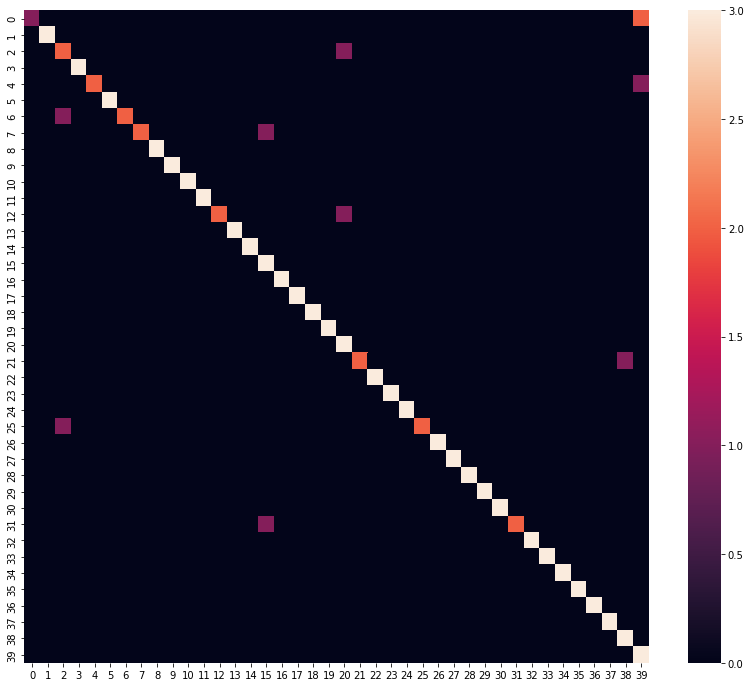

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)

plt.subplots(1, figsize=(14,12))
sns.heatmap(cm)

*Classification metrics:*

In [ ]:
print("Classification Results:\n{}".format(metrics.classification_report(y_test, y_pred)))

Classification Results:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         3
           2       0.50      0.67      0.57         3
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      0.67      0.80         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       0.60      1.00      0.75         3
          16       1.00      1.00      1.00         3
   

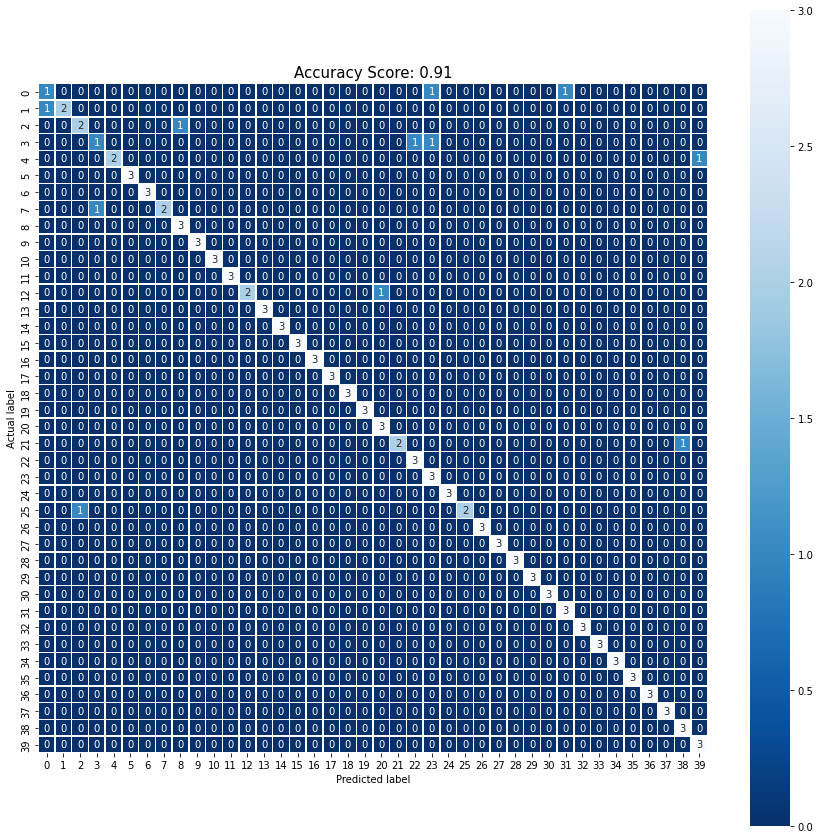

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.2f}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);